In [59]:
import matplotlib as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numba import jit
import datetime
%matplotlib inline

# Read data

In [44]:
data = pd.read_csv('c:/users/matt/desktop/hhout/stats_hour.csv')
data['Hour'] = pd.to_datetime(data['Hour'])

# Plot time series

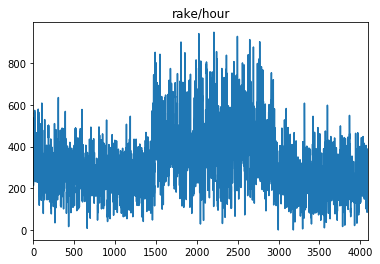

In [46]:
data['Rake'].plot(title="rake/hour")

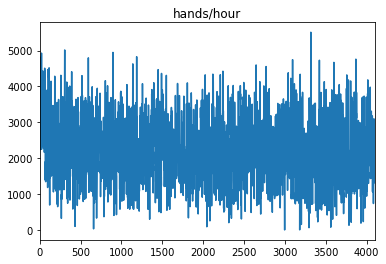

In [47]:
data['Hands'].plot(title="hands/hour")

# Augmented Dickey-Fuller test on hands/hour series

In [48]:
result = adfuller(data['Hands'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.529104
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.432


# Get dummies for hour of the day & day of the week

In [49]:
# May want finer grain distinction -- 4pm is the limit I think
data['Treat'] = (data['Hour'] >= datetime.date(2014,11,3)) & (data['Hour'] < datetime.date(2015,1,6))
# Switch date/time is 2015-01-05 at 1:09PM
data['After'] = (data['Hour'] > datetime.date(2015,1,6))

In [50]:
data['Monday'] = np.zeros(len(data))
data['Tuesday'] = np.zeros(len(data))
data['Wednesday'] = np.zeros(len(data))
data['Thursday'] = np.zeros(len(data))
data['Friday'] = np.zeros(len(data))
data['Saturday'] = np.zeros(len(data))
data['Sunday'] = np.zeros(len(data))

data['Midnight'] = np.zeros(len(data))
data['1AM'] = np.zeros(len(data))
data['2AM'] = np.zeros(len(data))
data['3AM'] = np.zeros(len(data))
data['4AM'] = np.zeros(len(data))
data['5AM'] = np.zeros(len(data))
data['6AM'] = np.zeros(len(data))
data['7AM'] = np.zeros(len(data))
data['8AM'] = np.zeros(len(data))
data['9AM'] = np.zeros(len(data))
data['10AM'] = np.zeros(len(data))
data['11AM'] = np.zeros(len(data))
data['Noon'] = np.zeros(len(data))
data['1PM'] = np.zeros(len(data))
data['2PM'] = np.zeros(len(data))
data['3PM'] = np.zeros(len(data))
data['4PM'] = np.zeros(len(data))
data['5PM'] = np.zeros(len(data))
data['6PM'] = np.zeros(len(data))
data['7PM'] = np.zeros(len(data))
data['8PM'] = np.zeros(len(data))
data['9PM'] = np.zeros(len(data))
data['10PM'] = np.zeros(len(data))
data['11PM'] = np.zeros(len(data))

In [51]:
def day_dummies(data):
    for i in range(len(data)):
        if data.loc[i, 'Hour'].weekday() == 0:
            data.loc[i, 'Monday'] = 1
        if data.loc[i, 'Hour'].weekday() == 1:
            data.loc[i, 'Tuesday'] = 1
        if data.loc[i, 'Hour'].weekday() == 2:
            data.loc[i, 'Wednesday'] = 1
        if data.loc[i, 'Hour'].weekday() == 3:
            data.loc[i, 'Thursday'] = 1
        if data.loc[i, 'Hour'].weekday() == 4:
            data.loc[i, 'Friday'] = 1
        if data.loc[i, 'Hour'].weekday() == 5:
            data.loc[i, 'Saturday'] = 1
        if data.loc[i, 'Hour'].weekday() == 6:
            data.loc[i, 'Sunday'] = 1
            
def hour_dummies(data):
    for i in range(len(data)):
        if data.loc[i, 'Hour'].hour == 0:
            data.loc[i, 'Midnight'] = 1
        if data.loc[i, 'Hour'].hour== 1:
            data.loc[i, '1AM'] = 1
        if data.loc[i, 'Hour'].hour== 2:
            data.loc[i, '2AM'] = 1
        if data.loc[i, 'Hour'].hour== 3:
            data.loc[i, '3AM'] = 1
        if data.loc[i, 'Hour'].hour== 4:
            data.loc[i, '4AM'] = 1
        if data.loc[i, 'Hour'].hour== 5:
            data.loc[i, '5AM'] = 1
        if data.loc[i, 'Hour'].hour== 6:
            data.loc[i, '6AM'] = 1
        if data.loc[i, 'Hour'].hour== 7:
            data.loc[i, '7AM'] = 1
        if data.loc[i, 'Hour'].hour== 8:
            data.loc[i, '8AM'] = 1
        if data.loc[i, 'Hour'].hour== 9:
            data.loc[i, '9AM'] = 1
        if data.loc[i, 'Hour'].hour== 10:
            data.loc[i, '10AM'] = 1
        if data.loc[i, 'Hour'].hour== 11:
            data.loc[i, '11AM'] = 1
        if data.loc[i, 'Hour'].hour== 12:
            data.loc[i, 'Noon'] = 1
        if data.loc[i, 'Hour'].hour== 13:
            data.loc[i, '1PM'] = 1
        if data.loc[i, 'Hour'].hour== 14:
            data.loc[i, '2PM'] = 1
        if data.loc[i, 'Hour'].hour== 15:
            data.loc[i, '3PM'] = 1
        if data.loc[i, 'Hour'].hour== 16:
            data.loc[i, '4PM'] = 1
        if data.loc[i, 'Hour'].hour== 17:
            data.loc[i, '5PM'] = 1
        if data.loc[i, 'Hour'].hour== 18:
            data.loc[i, '6PM'] = 1
        if data.loc[i, 'Hour'].hour== 19:
            data.loc[i, '7PM'] = 1
        if data.loc[i, 'Hour'].hour== 20:
            data.loc[i, '8PM'] = 1
        if data.loc[i, 'Hour'].hour== 21:
            data.loc[i, '9PM'] = 1
        if data.loc[i, 'Hour'].hour== 22:
            data.loc[i, '10PM'] = 1
        if data.loc[i, 'Hour'].hour== 23:
            data.loc[i, '11PM'] = 1

In [52]:
day_dummies(data)
hour_dummies(data)

# Drop "base dummies"

In [102]:
# Drop monday and noon from dummies
data = data.drop('Monday', axis=1)
data = data.drop('Noon', axis=1)
# Transform bool & float dummies to int dummies
data.loc[:, 'Treat':] = data.loc[:, 'Treat':].astype(int)

In [106]:
data.to_csv('c:/users/matt/desktop/hhout/hourly_all_dummies.csv')

In [103]:
X = data.loc[:, 'Treat':]
X = sm.add_constant(X)
rake = data[['Rake']]
hands = data[['Hands']]

# Run OLS

- Model on constant + dummies to test for intercept change

In [114]:
est1 = sm.OLS(rake, X).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rake   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 19 Mar 2017   Prob (F-statistic):               0.00
Time:                        13:31:57   Log-Likelihood:                -25075.
No. Observations:                4096   AIC:                         5.021e+04
Df Residuals:                    4064   BIC:                         5.042e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        269.3495      9.768     27.576      0.000       250.200   288.499
Treat        149.1337      4.071     36.633      0.000       141.152   157.115
After        -31.9630      4.390     -7.282      0.000       -40.569   -23.357
Tuesday       13.9435      6.383      2.184      0.029         1.429    26.458
Wednesday     21.0777      6.417      3.285      0.001         8.497    33.658
Thursday       2.6446      6.406      0.413      0.680        -9.915    15.204
Friday         2.0465      6.454      0.317      0.751       -10.607    14.700
Saturday      -7.9504      6.477     -1.228      0.220       -20.649     4.748
Sunday       -25.1910      6.545     -3.849      0.000       -38.023   -12.359
Midnight      59.9301     12.007      4.991      0.000        36.389    83.471
1AM           27.4671     11.990      2.291      0.022         3.960    50.974
2AM          -11.0347     11.990     -0.920      0.357       -34.542    12.472
3AM          -42.5466     11.956     -3.559      0.000       -65.987   -19.106
4AM          -59.4268     11.990     -4.956      0.000       -82.934   -35.920
5AM          -74.1753     12.007     -6.177      0.000       -97.716   -50.634
6AM          -83.8645     11.990     -6.995      0.000      -107.371   -60.358
7AM          -84.4660     11.973     -7.055      0.000      -107.939   -60.993
8AM          -72.5143     11.973     -6.057      0.000       -95.987   -49.041
9AM          -45.9537     11.990     -3.833      0.000       -69.460   -22.447
10AM         -38.4362     11.990     -3.206      0.001       -61.943   -14.930
11AM         -20.3855     12.025     -1.695      0.090       -43.960     3.189
1PM           17.4482     12.078      1.445      0.149        -6.232    41.128
2PM           20.7461     12.060      1.720      0.085        -2.899    44.391
3PM           36.3067     12.060      3.010      0.003        12.662    59.952
4PM           39.1747     12.079      3.243      0.001        15.494    62.855
5PM           34.7061     12.025      2.886      0.004        11.131    58.281
6PM           48.9658     12.025      4.072      0.000        25.391    72.541
7PM           62.4078     12.007      5.198      0.000        38.867    85.948
8PM           78.1909     12.025      6.502      0.000        54.616   101.766
9PM           85.3628     12.007      7.109      0.000        61.822   108.903
10PM          87.6037     12.007      7.296      0.000        64.063   111.144
11PM          78.7464     12.025      6.549      0.000        55.171   102.322
==============================================================================
Omnibus:                      198.404   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.190
Skew:                           0.382   Prob(JB):                     5.50e-77
Ku

In [115]:
est2 = sm.OLS(hands, X).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hands   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     39.30
Date:                Sun, 19 Mar 2017   Prob (F-statistic):          7.23e-205
Time:                        13:31:58   Log-Likelihood:                -32848.
No. Observations:                4096   AIC:                         6.576e+04
Df Residuals:                    4064   BIC:                         6.596e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2307.2138     65.148     35.415      0.000      2179.488  2434.940
Treat       -171.2065     27.153     -6.305      0.000      -224.441  -117.972
After       -212.6824     29.277     -7.264      0.000      -270.082  -155.283
Tuesday       28.3900     42.575      0.667      0.505       -55.080   111.860
Wednesday     95.3281     42.799      2.227      0.026        11.419   179.237
Thursday     -15.0063     42.728     -0.351      0.725       -98.776    68.763
Friday        -6.0944     43.048     -0.142      0.887       -90.491    78.302
Saturday     -75.4873     43.200     -1.747      0.081      -160.182     9.208
Sunday      -192.0896     43.655     -4.400      0.000      -277.677  -106.502
Midnight     415.4913     80.087      5.188      0.000       258.477   572.505
1AM          169.7103     79.972      2.122      0.034        12.921   326.499
2AM         -112.8130     79.972     -1.411      0.158      -269.602    43.976
3AM         -349.0078     79.744     -4.377      0.000      -505.349  -192.666
4AM         -440.3910     79.970     -5.507      0.000      -597.177  -283.605
5AM         -495.2288     80.087     -6.184      0.000      -652.243  -338.214
6AM         -539.5538     79.970     -6.747      0.000      -696.340  -382.768
7AM         -532.4114     79.855     -6.667      0.000      -688.972  -375.851
8AM         -457.2900     79.855     -5.726      0.000      -613.850  -300.730
9AM         -315.0131     79.970     -3.939      0.000      -471.798  -158.228
10AM        -242.4201     79.970     -3.031      0.002      -399.205   -85.635
11AM        -126.4913     80.202     -1.577      0.115      -283.731    30.749
1PM           88.2382     80.561      1.095      0.273       -69.705   246.181
2PM          103.6241     80.440      1.288      0.198       -54.083   261.331
3PM          234.0253     80.441      2.909      0.004        76.318   391.733
4PM          242.5459     80.562      3.011      0.003        84.601   400.491
5PM          225.2294     80.203      2.808      0.005        67.988   382.471
6PM          330.5941     80.203      4.122      0.000       173.352   487.836
7PM          401.2168     80.086      5.010      0.000       244.205   558.229
8PM          537.3425     80.203      6.700      0.000       380.100   694.585
9PM          616.7382     80.086      7.701      0.000       459.726   773.750
10PM         632.4925     80.086      7.898      0.000       475.481   789.504
11PM         546.5954     80.203      6.815      0.000       389.354   703.837
==============================================================================
Omnibus:                       52.260   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.453
Skew:                           0.265   Prob(JB):                     1.50e-12
Ku

In [116]:
est1_text = est1.summary().as_text()
est2_text = est2.summary().as_text()